<font size =6><b>제2회 코스포 x 데이콘 도서 추천 알고리즘 AI경진대회

* ref: https://dacon.io/competitions/official/236093/overview/description

* ID : 샘플 고유 ID
* User-ID : 유저 고유 ID
* Book-ID : 도서 고유 ID
* 유저 정보
    * Age : 나이
    * Location : 지역
* 도서 정보
    * Book-Title : 도서 명
    * Book-Author : 도서 저자
    * Year-Of-Publication : 도서 출판 년도 (-1일 경우 결측 혹은 알 수 없음)
    * Publisher : 출판사
    * Book-Rating : 유저가 도서에 부여한 평점 (0점 ~ 10점)

# Data Load

In [1]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings(action='ignore')

sns.set() 
#-------------------- 차트 관련 속성 (한글처리, 그리드) -----------
plt.rcParams['font.family']= 'Malgun Gothic'  # 한글 처리
plt.rcParams['axes.unicode_minus'] = False  # -, $ 등등에 표현 특수기호로 버리지 말고 다 써줘라.

In [2]:
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import OneHotEncoder

In [3]:
train = pd.read_csv('./datasets/train.csv')
test = pd.read_csv('./datasets/test.csv')
train.head()

,ID,User-ID,Book-ID,Book-Rating,Age,Location,Book-Title,Book-Author,Year-Of-Publication,Publisher
0,TRAIN_000000,USER_00000,BOOK_044368,8,23.0,"sackville, new brunswick, canada",Road Taken,Rona Jaffe,2001.0,Mira
1,TRAIN_000001,USER_00000,BOOK_081205,8,23.0,"sackville, new brunswick, canada",Macbeth (New Penguin Shakespeare),William Shakespeare,1981.0,Penguin Books
2,TRAIN_000002,USER_00000,BOOK_086781,0,23.0,"sackville, new brunswick, canada",Waverley (Penguin English Library),Walter Scott,1981.0,Penguin Books
3,TRAIN_000003,USER_00000,BOOK_098622,0,23.0,"sackville, new brunswick, canada",Mother Earth Father Sky,Sue Harrison,1991.0,Avon
4,TRAIN_000004,USER_00000,BOOK_180810,8,23.0,"sackville, new brunswick, canada",She Who Remembers,Linda Lay Shuler,1989.0,Signet Book


In [4]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 871393 entries, 0 to 871392
Data columns (total 10 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   ID                   871393 non-null  object 
 1   User-ID              871393 non-null  object 
 2   Book-ID              871393 non-null  object 
 3   Book-Rating          871393 non-null  int64  
 4   Age                  871393 non-null  float64
 5   Location             871393 non-null  object 
 6   Book-Title           871393 non-null  object 
 7   Book-Author          871393 non-null  object 
 8   Year-Of-Publication  871393 non-null  float64
 9   Publisher            871393 non-null  object 
dtypes: float64(2), int64(1), object(7)
memory usage: 66.5+ MB


In [5]:
train['Location'].nunique()

20971

# User Feature

## Age
* 구간화해서 OnehotEncoding하거나, 그냥 사용.
    * Tree Model은 OnehotEncoding 중요하지 않을 수도 있으니까

## Location
* 전부 OnehotEncoding 하면 너무 많음.
    * 나라기준, 10개 국가로 나눔.

In [256]:
temp = train['Location'].str.split()
temp = temp.apply(lambda x:x[-1])
vc_list = temp.value_counts()
vc_list

usa               630044
canada             78571
kingdom            27050
germany            23471
australia          15270
                   ...  
mateo                  1
liguria,               1
hertfordshire,         1
unknown                1
milano,                1
Name: Location, Length: 424, dtype: int64

In [258]:
vc_list[vc_list < 15000] 

spain             12520
n/a               11176
france             8965
portugal           5974
zealand            4676
                  ...  
mateo                 1
liguria,              1
hertfordshire,        1
unknown               1
milano,               1
Name: Location, Length: 418, dtype: int64

In [251]:
temp.nunique()

424

In [253]:
temp = test['Location'].str.split()
temp = temp.apply(lambda x:x[-1])
temp.value_counts()

usa                    116389
canada                  14419
kingdom                  6007
germany                  4187
australia                2957
                        ...  
zimbabwe                    1
franicsco                   1
morocco                     1
tonga                       1
schleswig-holstein,         1
Name: Location, Length: 232, dtype: int64

In [254]:
temp.nunique()

232

# Book Feature

In [6]:
train['Book-ID'].nunique()

243441

In [7]:
train['Book-ID'].unique()[:10]

array(['BOOK_044368', 'BOOK_081205', 'BOOK_086781', 'BOOK_098622',
       'BOOK_180810', 'BOOK_206799', 'BOOK_239414', 'BOOK_269070',
       'BOOK_190739', 'BOOK_210079'], dtype=object)

In [8]:
train[train['Book-ID']=='BOOK_081205']

,ID,User-ID,Book-ID,Book-Rating,Age,Location,Book-Title,Book-Author,Year-Of-Publication,Publisher
1,TRAIN_000001,USER_00000,BOOK_081205,8,23.0,"sackville, new brunswick, canada",Macbeth (New Penguin Shakespeare),William Shakespeare,1981.0,Penguin Books
174204,TRAIN_174204,USER_18723,BOOK_081205,0,35.0,"stuttgart, baden-württemberg, germany",Macbeth (New Penguin Shakespeare),William Shakespeare,1981.0,Penguin Books
570922,TRAIN_570922,USER_58487,BOOK_081205,7,35.0,"east victoria park, western australia, australia",Macbeth (New Penguin Shakespeare),William Shakespeare,1981.0,Penguin Books
716817,TRAIN_716817,USER_74400,BOOK_081205,0,32.0,"eastbourne, england, united kingdom",Macbeth (New Penguin Shakespeare),William Shakespeare,1981.0,Penguin Books
745108,TRAIN_745108,USER_77330,BOOK_081205,0,31.0,"farnborough, hampshire, united kingdom",Macbeth (New Penguin Shakespeare),William Shakespeare,1981.0,Penguin Books
760612,TRAIN_760612,USER_79395,BOOK_081205,9,25.0,"zeist, utrecht, netherlands",Macbeth (New Penguin Shakespeare),William Shakespeare,1981.0,Penguin Books


In [10]:
train[train['Book-Title'].str.contains('Macbeth')]

,ID,User-ID,Book-ID,Book-Rating,Age,Location,Book-Title,Book-Author,Year-Of-Publication,Publisher
1,TRAIN_000001,USER_00000,BOOK_081205,8,23.0,"sackville, new brunswick, canada",Macbeth (New Penguin Shakespeare),William Shakespeare,1981.0,Penguin Books
11865,TRAIN_011865,USER_01455,BOOK_018108,10,28.0,"olathe, kansas, usa",Macbeth,William Shakespeare,1981.0,Pocket Books
14759,TRAIN_014759,USER_01657,BOOK_144974,0,22.0,"appleton, wisconsin, usa",Macbeth (Dover Thrift Editions),William Shakespeare,1993.0,Dover Publications
17061,TRAIN_017061,USER_01928,BOOK_047850,5,32.0,"melbourne, victoria, australia",Macbeth,William Shakespeare,2003.0,Washington Square Press
23737,TRAIN_023737,USER_02636,BOOK_144974,0,25.0,"new york, new york, usa",Macbeth (Dover Thrift Editions),William Shakespeare,1993.0,Dover Publications
...,...,...,...,...,...,...,...,...,...,...
863961,TRAIN_863961,USER_91320,BOOK_070453,0,35.0,"lincoln, nebraska, usa",Death of a Dentist (Hamish Macbeth Mysteries (...,M. C. Beaton,1998.0,Warner Books
864297,TRAIN_864297,USER_91320,BOOK_169135,0,35.0,"lincoln, nebraska, usa","Death of a Gossip, A Hamish Macbeth Mystery",M. C. Beaton,1988.0,Fawcett Books
867119,TRAIN_867119,USER_91632,BOOK_031845,10,55.0,"portland, oregon, usa",Macbeth,William Shakespeare,1978.0,Signet Book
867393,TRAIN_867393,USER_91662,BOOK_115497,0,22.0,"atlanta, georgia, usa",Hamlet Macbeth King Lear,William Shakespeare,-1.0,Scholastic Inc


In [11]:
train[train['Book-Author'].str.contains('Shakespeare')]

,ID,User-ID,Book-ID,Book-Rating,Age,Location,Book-Title,Book-Author,Year-Of-Publication,Publisher
1,TRAIN_000001,USER_00000,BOOK_081205,8,23.0,"sackville, new brunswick, canada",Macbeth (New Penguin Shakespeare),William Shakespeare,1981.0,Penguin Books
367,TRAIN_000367,USER_00077,BOOK_231155,10,43.0,"williamsburg, virginia, usa",Hamlet,William Shakespeare,1992.0,Washington Square Press
454,TRAIN_000454,USER_00101,BOOK_021606,0,30.0,"wien, wien, austria",Merchant of Venice,Shakespeare,-1.0,Penguin Putnam~mass
631,TRAIN_000631,USER_00151,BOOK_024188,9,35.0,"san jose, california, usa",Tempest (New Penguin Shakespeare),William Shakespeare,1981.0,Penguin Books
1097,TRAIN_001097,USER_00190,BOOK_067250,8,37.0,"st. john`s, newfoundland, canada",The Winter's Tale (Signet Classic Shakespeare ...,William Shakespeare,1988.0,Signet Classics
...,...,...,...,...,...,...,...,...,...,...
867206,TRAIN_867206,USER_91632,BOOK_171078,8,55.0,"portland, oregon, usa",The Comedy of Errors,William Shakespeare,1991.0,Pocket Books
867381,TRAIN_867381,USER_91662,BOOK_011436,0,22.0,"atlanta, georgia, usa","Four Great Comedies: The Taming of the Shrew, ...",William Shakespeare,1989.0,Signet Classics
867393,TRAIN_867393,USER_91662,BOOK_115497,0,22.0,"atlanta, georgia, usa",Hamlet Macbeth King Lear,William Shakespeare,-1.0,Scholastic Inc
867486,TRAIN_867486,USER_91694,BOOK_153124,10,24.0,"long beach, california, usa",Much Ado About Nothing (Dover Thrift Editions),William Shakespeare,1994.0,Dover Publications


## Book-Title, Book-Author, Publisher
* Word Embedding 방식 고려
* KMean Cluster로 그룹화하거나
    * 그룹화할때, Book-Title, Bootk-Author, Publisher 모두 concat해서 그룹화
    * Book-Title, Bootk-Author 만 concat + Publisher 따로 encoding
* Embeddign 함수(Keras, DeepLearning) 활용 --> 기존의 WordEmbedding은 문장이 주어질 때, 단어사이의 관계성을 봄 (예, 앞뒤 단어)  
이 경우 전체 Vector 내용을 다 봐야함. 


### Book-Title

In [12]:
train['Book-Title'].head(30)

0                                            Road Taken
1                     Macbeth (New Penguin Shakespeare)
2                    Waverley (Penguin English Library)
3                               Mother Earth Father Sky
4                                     She Who Remembers
5                    Neuromancer (Remembering Tomorrow)
6                                     The Little Prince
7                        Forests of the Heart (Newford)
8     Self Matters : Creating Your Life from the Ins...
9     The Self Matters Companion : Helping You Creat...
10    Don't Let Jerks Get the Best of You / Advice F...
11                            Jewel (Oprah's Book Club)
12    Wir sind Erinnerung. GedÃ?Â¤chtnis und PersÃ?Â...
13                            2061. Odyssee III. Roman.
14                                     Die Jury. Roman.
15                                   Frisch gepreÃ?Â?t.
16                                      Hitlers Helfer.
17    Saturns Schatten. Die dunklen Welten der D

In [13]:
import re 

def my_reg(text):
    text = text.strip()

    t_list = []
    for t in text.split():
        t = re.sub(r'\([^)]*\)', '', t.strip())   #(s) 제거
        t = re.sub(r'[^)]*\)', ''  , t.strip())     #s) 제거
        t = re.sub(r'\([^)]*', ''  , t.strip())     #(s 제거
        t = re.sub(r' [\w*\W+\w*] ', '', t.strip())
        t.strip()
        
        if t.isalpha() and len(t)>2:
            t_list.append(t)
            
    return ' '.join(t_list)

train['Book-Title2'] = train['Book-Title'].apply(lambda x: my_reg(x))
test['Book-Title2'] = test['Book-Title'].apply(lambda x: my_reg(x))

In [14]:
train[['Book-Title','Book-Title2']][train['Book-ID']=='BOOK_229031']

,Book-Title,Book-Title2
29,Ensel und Krete. Ein MÃ?Â¤rchen aus Zamonien v...,Ensel und Ein aus Zamonien von Hildegunst von
769319,Ensel und Krete. Ein MÃ?Â¤rchen aus Zamonien v...,Ensel und Ein aus Zamonien von Hildegunst von


In [15]:
train[train['Book-Title'].str.contains('rchen')].head()

,ID,User-ID,Book-ID,Book-Rating,Age,Location,Book-Title,Book-Author,Year-Of-Publication,Publisher,Book-Title2
29,TRAIN_000029,USER_00003,BOOK_229031,10,24.0,"magdeburg, sachsen-anhalt, germany",Ensel und Krete. Ein MÃ?Â¤rchen aus Zamonien v...,Walter Moers,2000.0,Eichborn,Ensel und Ein aus Zamonien von Hildegunst von
3142,TRAIN_003142,USER_00495,BOOK_118110,10,4.0,"tübingen, baden-württemberg, germany",Peterchens Mondfahrt. ( Ab 4 J.).,Gerdt von Bassewitz,2000.0,Arena,Peterchens
21855,TRAIN_021855,USER_02288,BOOK_194938,4,35.0,"berlin, berlin, germany",Der Hauptmann von KÃ?Â¶penick. Ein deutsches M...,Carl Zuckmayer,1995.0,"Fischer (Tb.), Frankfurt",Der Hauptmann von Ein deutsches drei
22253,TRAIN_022253,USER_02386,BOOK_262466,0,29.0,"rheinfelden, baden-wuerttemberg, germany",Das GummibÃ?Â¤rchen- Orakel.,Dietmar Bittrich,1998.0,Goldmann,Das
23319,TRAIN_023319,USER_02544,BOOK_182364,7,35.0,"oldenburg, schleswig-holstein, germany",Ensel und Krete. Ein MÃ?Â¤rchen aus Zamonien v...,Walter Moers,2002.0,Goldmann,Ensel und Ein aus Zamonien von Hildegunst von


In [16]:
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from nltk.stem import WordNetLemmatizer
import nltk
import string

# ord: 유니코드 정수 반환 
# string.punctuation: 특수문자열

punc_str = string.punctuation
punc_str+='0123456789'

remove_punct_dict = dict((ord(punct), "") for punct in punc_str)

lemmar = WordNetLemmatizer()

def LemTokens(tokens):
    return [lemmar.lemmatize(token) for token in tokens]
def LemNormalize(text):
    #구두점 삭제해준 상태로 토큰화
    return LemTokens(nltk.word_tokenize(text.lower().translate(remove_punct_dict)))
def Normalize(text):
    #구두점 삭제해준 상태로 토큰화
    return nltk.word_tokenize(text.lower().translate(remove_punct_dict))

In [17]:
from nltk.corpus import stopwords

stop_words_list = []
temp = stopwords.words('english')
stop_words_list.extend(temp)
temp = stopwords.words('german')
print(temp[:10])
stop_words_list.extend(temp)
temp = stopwords.words('portuguese')
print(temp[:10])
stop_words_list.extend(temp)
temp = stopwords.words('spanish')
print(temp[:10])
stop_words_list.extend(temp)

len(stop_words_list)

['aber', 'alle', 'allem', 'allen', 'aller', 'alles', 'als', 'also', 'am', 'an']
['a', 'à', 'ao', 'aos', 'aquela', 'aquelas', 'aquele', 'aqueles', 'aquilo', 'as']
['de', 'la', 'que', 'el', 'en', 'y', 'a', 'los', 'del', 'se']


931

In [18]:
temp = train[['Book-ID','Book-Title2']]
temp = temp.drop_duplicates()
temp.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 243441 entries, 0 to 871392
Data columns (total 2 columns):
 #   Column       Non-Null Count   Dtype 
---  ------       --------------   ----- 
 0   Book-ID      243441 non-null  object
 1   Book-Title2  243441 non-null  object
dtypes: object(2)
memory usage: 5.6+ MB


In [22]:
type(' '.join(temp['Book-Title2'].values))

str

In [35]:
tfidf_vect = CountVectorizer(tokenizer=LemNormalize,
                             stop_words=stop_words_list,
                             min_df=0.9)   #   min_df=0.05, max_df=0.85  # 빈도수 0.05이하, 0.85이상의 빈도수 단어들 제거

# tfidf_vect.fit(temp['Book-Title2'])
tfidf_vect.fit([' '.join(temp['Book-Title2'].values)])
title_vect_train = tfidf_vect.transform(train['Book-Title2'])
title_vect_test = tfidf_vect.transform(test['Book-Title2'])
title_vect_train.shape, title_vect_test.shape

((871393, 49354), (159621, 49354))

In [336]:
tfidf_vect = TfidfVectorizer(tokenizer=LemNormalize,
                             stop_words=stop_words_list)   #   min_df=0.05, max_df=0.85  # 빈도수 0.05이하, 0.85이상의 빈도수 단어들 제거

tfidf_vect.fit(train['Book-Title2'])
title_vect_train = tfidf_vect.transform(train['Book-Title2'])
title_vect_test = tfidf_vect.transform(test['Book-Title2'])
title_vect_train.shape, title_vect_test.shape

KeyboardInterrupt: 

In [263]:
list(tfidf_vect.vocabulary_.items())[:10]

[('road', 53289),
 ('taken', 61957),
 ('macbeth', 37900),
 ('new', 43674),
 ('penguin', 47141),
 ('shakespeare', 56827),
 ('waverley', 68430),
 ('english', 19513),
 ('library', 36167),
 ('mother', 42069)]

### Book-Author
* 일반적 이름 순서: (Given Name) (Middle Name) (Family Name)
    * Given Name과 Family Name만 활용
* 인코딩 (예외처리)
    * 대소문자 처리 필요.
    * Family Name만 있는 경우
        * 예) Shakespeare -> Full Name은 William Shakespeare, But Shakespeare라고만 표기된 경우가 있음.
        * Family Name만 사용하기에는 Family Name이 같은 저자가 너무 많음.
        * OnehotEncoder말고, CoutVector활용.
    * CountVector 활용.

In [289]:
train['Book-Author'].head()

0             Rona Jaffe
1    William Shakespeare
2           Walter Scott
3           Sue Harrison
4       Linda Lay Shuler
Name: Book-Author, dtype: object

In [318]:
train[train['Book-Author'].str.contains('Shakespeare')].head()

,ID,User-ID,Book-ID,Book-Rating,Age,Location,Book-Title,Book-Author,Year-Of-Publication,Publisher
1,TRAIN_000001,USER_00000,BOOK_081205,8,23.0,"sackville, new brunswick, canada",Macbeth (New Penguin Shakespeare),William Shakespeare,1981.0,Penguin Books
367,TRAIN_000367,USER_00077,BOOK_231155,10,43.0,"williamsburg, virginia, usa",Hamlet,William Shakespeare,1992.0,Washington Square Press
454,TRAIN_000454,USER_00101,BOOK_021606,0,30.0,"wien, wien, austria",Merchant of Venice,Shakespeare,-1.0,Penguin Putnam~mass
631,TRAIN_000631,USER_00151,BOOK_024188,9,35.0,"san jose, california, usa",Tempest (New Penguin Shakespeare),William Shakespeare,1981.0,Penguin Books
1097,TRAIN_001097,USER_00190,BOOK_067250,8,37.0,"st. john`s, newfoundland, canada",The Winter's Tale (Signet Classic Shakespeare ...,William Shakespeare,1988.0,Signet Classics


In [291]:
def convert_author(s):
    temp = []
    temp_split = s.split()
    if len(temp_split) > 1:
        temp.append(temp_split[0])
        temp.append(temp_split[-1])
    else:
        temp.append(temp_split[0])
    # temp.append(temp_split[-1])
    return " ".join(temp)

train['Book-Author'] = train['Book-Author'].apply(lambda x:convert_author(x))
test['Book-Author'] = test['Book-Author'].apply(lambda x:convert_author(x))

train['Book-Author'] = train['Book-Author'].str.lower()
test['Book-Author'] = test['Book-Author'].str.lower()

In [292]:
le = LabelEncoder()
le.fit(train['Book-Author'].values.reshape(-1,1))
train['author_code'] = le.transform(train['Book-Author'].values.reshape(-1,1))
train[['Book-Author', 'author_code']].head()

,Book-Author,author_code
0,rona jaffe,70364
1,william shakespeare,83260
2,walter scott,81939
3,sue harrison,76145
4,linda shuler,49414


In [293]:
# temp_train = train[['Book-Title','Publisher','author_code']]
temp_train = train[['Book-Title','author_code']]
temp_train = temp_train.drop_duplicates()
temp_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 224260 entries, 0 to 871380
Data columns (total 2 columns):
 #   Column       Non-Null Count   Dtype 
---  ------       --------------   ----- 
 0   Book-Title   224260 non-null  object
 1   author_code  224260 non-null  int32 
dtypes: int32(1), object(1)
memory usage: 4.3+ MB


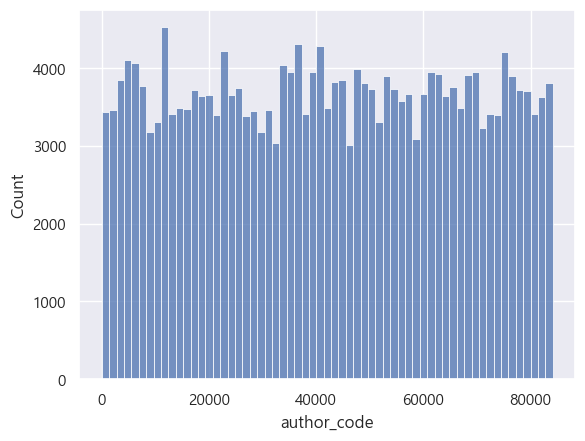

In [294]:
sns.histplot(temp_train['author_code'])
plt.show()

In [298]:
cnt_se = temp_train['author_code'].value_counts().sort_values(ascending=False)
cnt_se

83260    451
769      426
3793     404
25422    371
11245    342
        ... 
48880      1
62617      1
69777      1
83962      1
75216      1
Name: author_code, Length: 84151, dtype: int64

In [308]:
cnt_se[cnt_se>30].shape

(669,)

In [310]:
autindex_list = cnt_se[:500].index.values
autindex_list[:10]

array([83260,   769,  3793, 25422, 11245, 75258,  6043, 33264, 65819,
       60749], dtype=int64)

In [311]:
dic = {}

for i, pv in enumerate(autindex_list):
    k = train[train['author_code'] == pv]['Book-Author'].values[0]
    dic[k] = i+1
    
train['Book-Author2'] = train['Book-Author'].map(dic)
test['Book-Author2'] = test['Book-Author'].map(dic)

train['Book-Author2'] = train['Book-Author2'].fillna(0)
test['Book-Author2'] = test['Book-Author2'].fillna(0)

train['Book-Author2'] = train['Book-Author2'].astype(int)
test['Book-Author2'] = test['Book-Author2'].astype(int)

train[['Book-Author','Book-Author2']].head(10)

,Book-Author,Book-Author2
0,rona jaffe,0
1,william shakespeare,1
2,walter scott,0
3,sue harrison,0
4,linda shuler,0
5,william gibson,0
6,antoine saint-exupã©ry,0
7,charles lint,329
8,phillip mcgraw,0
9,phillip mcgraw,0


In [313]:
oh = OneHotEncoder(handle_unknown='ignore')
oh.fit(train['Book-Author2'].values.reshape(-1,1))
train_author_oh = oh.transform(train['Book-Author2'].values.reshape(-1,1))
test_author_oh = oh.transform(test['Book-Author2'].values.reshape(-1,1))

train_author_oh.shape, test_author_oh.shape

((871393, 501), (159621, 501))

In [268]:
# oh = OneHotEncoder(handle_unknown='ignore')
# oh.fit(train['Book-Author'].values.reshape(-1,1))
# train_author_oh = oh.transform(train['Book-Author'].values.reshape(-1,1))
# test_author_oh = oh.transform(test['Book-Author'].values.reshape(-1,1))

# train_author_oh.shape, test_author_oh.shape

((871393, 84151), (159621, 84151))

In [312]:
cnt_vect = CountVectorizer(tokenizer=Normalize) 

cnt_vect.fit(train['Book-Author'])
train_author_vec = cnt_vect.transform(train['Book-Author'])
test_author_vec = cnt_vect.transform(test['Book-Author'])
# OnehotEncoding과 columns수는 거의 차이가 없는데, 이 경우 성만 표기된 경우 어느정도 유사하게 인식 될 수 있다.
# 성이나 이름이 동일한 다른 작가의 경우도 유사하게 인식 될 수 있기는 한데... 
# 학습을 돌려보고 이에 대해, 예외처리하고 OnehotEncoding 결과와 비교 후, 활용.
train_author_vec.shape, test_author_vec.shape  

((871393, 43860), (159621, 43860))

### Publisher
* 대소문자 처리 필요.
* 예외처리 
    * () 표시
        * 예) Owl Books, Owl Books (NY)
    * co, co. company 삭제
    * &amp; 처리  
        * &nbsp;   - ” ” : 공백(스페이스 한 칸)을 의미
        * &lt;     - 부등호(<)
        * &gt;     - 부등호(>)
        * &amp;    - 앰퍼샌드(&) 기호
        * &quot;   - 쌍따옴표(“)
        * &#035;   - sharp(#)
        * &#039;   - 따옴표(‘)
    * / 처리 
    
* 예외 처리후, 빈도수로 Count하고, 자주 등장하는 출판사로 구분이 되면 대형 출판사와 작은 출판사로 구분해서 encoding 함.

In [181]:
train['Publisher'] = train['Publisher'].str.lower()
test['Publisher'] = test['Publisher'].str.lower()

In [182]:
import re 

def my_reg(text):
    remove_list = ['co','company']
    # text = re.sub(r'/^\s+|\s+$/g', '', text.strip())#앞뒤 공백 제거
    text = text.strip()
    # text = text.replace(r' /','/')  #앞뒤 공백 제거
    # text = text.replace(r'/ ','/')  #앞뒤 공백 제거
    
    t_list = []
    for t in text.split():
        t = re.sub(r'\([^)]*\)', '', t.strip())   #(s) 제거
        t = re.sub(r'[^)]*\)', ''  , t.strip())     #s) 제거
        t = re.sub(r'\([^)]*', ''  , t.strip())     #(s 제거
        t = re.sub(r'[.,]', '', t.strip())
        t.strip()
        # t = re.sub(' +', ' '       , t.strip())          #공백,탭 제거
        
        if t not in remove_list:
            t_list.append(t)
            
    if t_list[-1] == '&amp;':
        t_list.pop()

    return ' '.join(t_list)

train['Publisher'] = train['Publisher'].apply(lambda x: my_reg(x))
test['Publisher'] = test['Publisher'].apply(lambda x: my_reg(x))

In [187]:


le = LabelEncoder()
le.fit(train['Publisher'].values.reshape(-1,1))
train['Publisher_code'] = le.transform(train['Publisher'].values.reshape(-1,1))
# test['Publisher_code'] = le.transform(test['Publisher'].values.reshape(-1,1))

train[['Publisher', 'Publisher_code']].head()
# train['Publisher'] = train['Publisher'].astype('category')
# train['Publisher_code'] = train['Publisher'].cat.codes

,Publisher,Publisher_code
0,mira,8806
1,penguin books,10203
2,penguin books,10203
3,avon,1146
4,signet book,12207


In [188]:
## Book-Title, Book-Author, Publisher, 'Publisher_code'
temp_train = train[['Book-Title','Book-Author','Publisher_code']]
temp_train = temp_train.drop_duplicates()
temp_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 238868 entries, 0 to 871392
Data columns (total 3 columns):
 #   Column          Non-Null Count   Dtype 
---  ------          --------------   ----- 
 0   Book-Title      238868 non-null  object
 1   Book-Author     238868 non-null  object
 2   Publisher_code  238868 non-null  int32 
dtypes: int32(1), object(2)
memory usage: 6.4+ MB


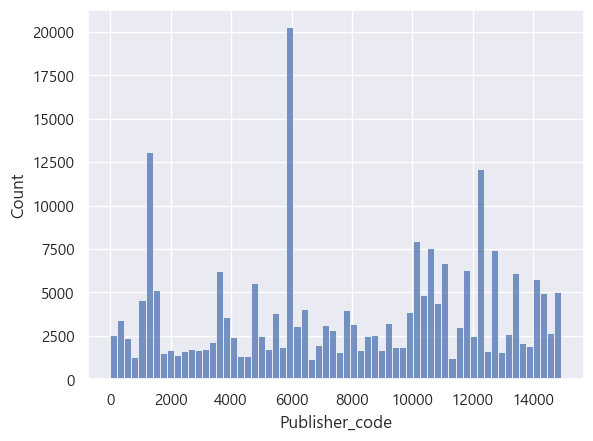

In [189]:
sns.histplot(temp_train['Publisher_code'])
plt.show()

In [190]:
cnt_se = temp_train['Publisher_code'].value_counts()
cnt_se

5900     7035
12219    3931
10544    3383
1246     3275
1274     3180
         ... 
6049        1
2465        1
4408        1
3186        1
5615        1
Name: Publisher_code, Length: 14931, dtype: int64

In [193]:
pubindex_list = cnt_se.sort_values(ascending=False)[:100].index.values
pubindex_list

array([ 5900, 12219, 10544,  1246,  1274,  5950, 11845, 12259, 10203,
        1554, 10240, 14239,  4793, 11121, 12207, 12606,  3535, 12600,
       14869,  1270,  1146,  5968, 13382, 14072,  7155,  5941,   179,
        9837,  6420,  1283, 10278,  7903,  3902,  7715,  5445,  3513,
       10886,  5420, 11945,   356,  5996, 11871, 13432,  6258, 10916,
       10215,  5211,  1147, 14522, 10831, 14182,  7286, 12276, 10445,
        5995, 11115,  1551, 10532,  1213, 11101, 14835, 10548,  9244,
         407, 10668,  5862,  6208,  6921, 11117, 13506,  8118,  8806,
       11607,  9514,  5963, 12643, 10919,   688,  3967,  4874,  3882,
        3530,  3452, 12598, 11870,  7283,  7772,  1286, 14046,  6027,
       13383,  5992,  9948,  9243,  8492, 14613,  8845,  9701, 14737,
        1596], dtype=int64)

In [211]:
dic = {}

for i, pv in enumerate(pubindex_list):
    k = train[train['Publisher_code'] == pv]['Publisher'].values[0]
    dic[k] = i+1
    
train['Publisher2'] = train['Publisher'].map(dic)
test['Publisher2'] = test['Publisher'].map(dic)

train['Publisher2'] = train['Publisher2'].fillna(0)
test['Publisher2'] = test['Publisher2'].fillna(0)

train['Publisher2'] = train['Publisher2'].astype(int)
test['Publisher2'] = test['Publisher2'].astype(int)

train[['Publisher','Publisher2']].head(10)

,Publisher,Publisher2
0,mira,72
1,penguin books,9
2,penguin books,9
3,avon,21
4,signet book,15
5,ace books,27
6,harvest books,90
7,tor books,23
8,free press,0
9,free press,0


In [173]:
# from sklearn.preprocessing import OneHotEncoder

# oh = OneHotEncoder(handle_unknown='ignore')
# oh.fit(train['Publisher'].values.reshape(-1,1))
# train_publisher_oh = oh.transform(train['Publisher'].values.reshape(-1,1))
# test_publisher_oh = oh.transform(test['Publisher'].values.reshape(-1,1))

# train_publisher_oh.shape, test_publisher_oh.shape

((871393, 14931), (159621, 14931))

## 군집화

In [174]:
title_vect_train.shape, train_author_vec.shape, train_publisher_oh.shape

((871393, 520881), (871393, 84327), (871393, 14931))

In [175]:
title_vect_train.shape[1]+ train_author_vec.shape[1]+train_publisher_oh.shape[1]

# type(train_publisher_oh)

620139

In [176]:
from scipy.sparse import hstack

stack_vec = hstack([title_vect_train, train_author_vec])
stack_vec.shape, type(stack_vec)

((871393, 605208), scipy.sparse.coo.coo_matrix)

In [270]:
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_samples

kmeans = KMeans(n_clusters=300,  random_state=11)  #max_iter=10000,
kmeans.fit(stack_vec.tocsr())

cluster_label = kmeans.predict(stack_vec.tocsr())
sil_sample = silhouette_samples(stack_vec.tocsr(), kmeans.labels_)
                                   
kmeans.inertia_, sil_sample                                   

KeyboardInterrupt: 

In [314]:
kmeans = KMeans(n_clusters=100,  random_state=11)  #max_iter=10000,
kmeans.fit(title_vect_train.tocsr())

cluster_label = kmeans.predict(title_vect_train.tocsr())
sil_sample = silhouette_samples(title_vect_train.tocsr(), kmeans.labels_)
                                   
kmeans.inertia_, sil_sample    


KeyboardInterrupt



## Year-Of-Publication
* Null 처리 필요